In [1]:
# !pip install easyocr

In [2]:
import google.colab.drive as dr

In [3]:
dr.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/



/content/drive/MyDrive/Colab Notebooks


In [5]:
import easyocr
import torch

In [6]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [7]:
reader = easyocr.Reader(['en'], gpu = False)


In [8]:
imagePath = "1.png"

In [9]:
ls

 1.png   5.png                             'Result of Experiments.ipynb'
 2.jpg   AmazonStockForcasting.ipynb        T1.csv
 3.jpg   AMZN.csv                           textToSpeech.mp3
 4.jpg  'Copy of Welcome To Colaboratory'   WindPowerPrediction
 4.png   hourly_nm.csv


In [10]:
result = reader.readtext(imagePath)

result

[([[3, 3], [145, 3], [145, 23], [3, 23]],
  'It was the best of',
  0.953529358333611),
 ([[2, 27], [185, 27], [185, 47], [2, 47]],
  'times;, it was the worst',
  0.4469101816311119),
 ([[0, 46], [188, 46], [188, 74], [0, 74]],
  'of times, it was the age',
  0.7097553787637377),
 ([[3, 71], [89, 71], [89, 91], [3, 91]], 'of wisdom', 0.7961631913311689),
 ([[95, 73], [175, 73], [175, 91], [95, 91]],
  'it was the',
  0.9932056377830621),
 ([[2, 94], [146, 94], [146, 118], [2, 118]],
  'age of foolishness',
  0.8149599297365002)]

In [11]:
img = cv2.imread(imagePath)


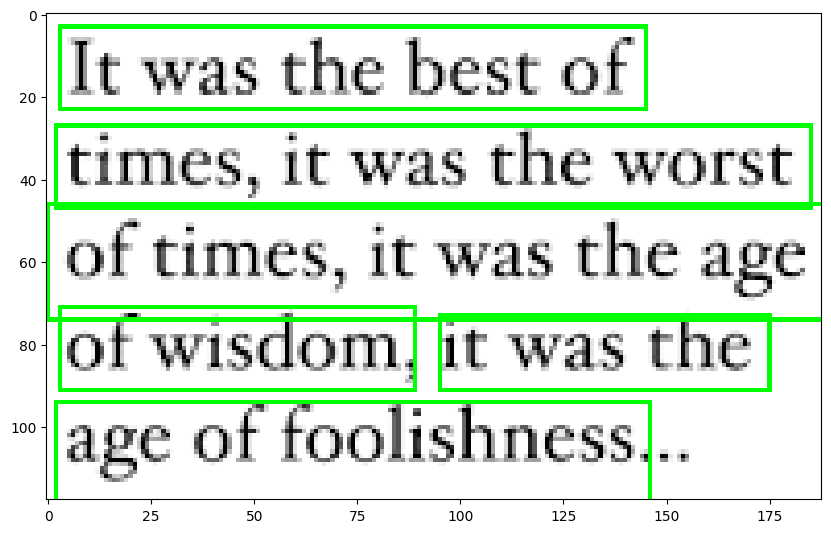

In [12]:
fullText = ""

for detection in result:
  top_left = tuple([int(val) for val in detection[0][0]])
  bottom_right = tuple([int(val) for val in detection[0][2]])
  text = detection[1]
  fullText = fullText + " " + text
  font = cv2.FONT_HERSHEY_SIMPLEX

  img = cv2.rectangle(img,top_left,bottom_right, (0,255,0),1)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [13]:
# !pip install gtts

In [14]:
from gtts import gTTS

In [15]:
language = "en"

speech = gTTS(fullText, lang = language, slow = False, tld = "com.au")

speech.save("textToSpeech.mp3")

In [16]:
top_left = tuple(result[2][0][0])
bottom_right = tuple(result[2][0][2])
text = result[2][1]

font = cv2.FONT_HERSHEY_SIMPLEX

In [17]:
text

'of times, it was the age'

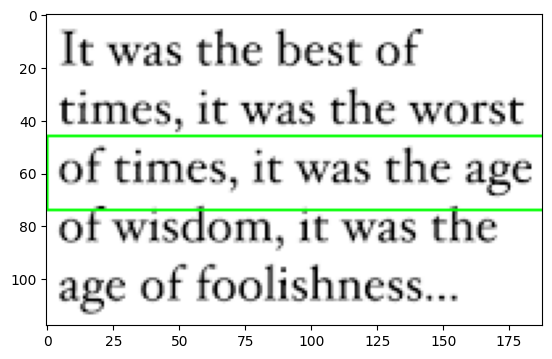

In [18]:
img = cv2.imread(imagePath)

img = cv2.rectangle(img,top_left,bottom_right, (0,255,0),1)
# img = cv2.putText(img,text,top_left,font, 0.1, (0,0,0), cv2.LINE_AA)
plt.imshow(img)
plt.show()